## Edward Billy Hadipuspito - 1301201291
### Mid Term Assignment - Gait Analysis with Complementary Filter

---



### Import Library and Dataset

---



In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfa = pd.read_excel('https://github.com/edward-billy/gait-analysis/blob/main/Gait_Analysis_IoT_2023-04-15_19-01-18.xls?raw=true',sheet_name = 'Linear Acceleration')
dfg = pd.read_excel('https://github.com/edward-billy/gait-analysis/blob/main/Gait_Analysis_IoT_2023-04-15_19-01-18.xls?raw=true',sheet_name = 'Gyroscope')

# dataset alternatif
# dfa = pd.read_excel('https://github.com/edward-billy/gait-analysis/blob/main/Gait_2023-04-15_21-08-53.xls?raw=true',sheet_name = 'Linear Acceleration')
# dfg = pd.read_excel('https://github.com/edward-billy/gait-analysis/blob/main/Gait_2023-04-15_21-08-53.xls?raw=true',sheet_name = 'Gyroscope')

### Plot Raw Data


---



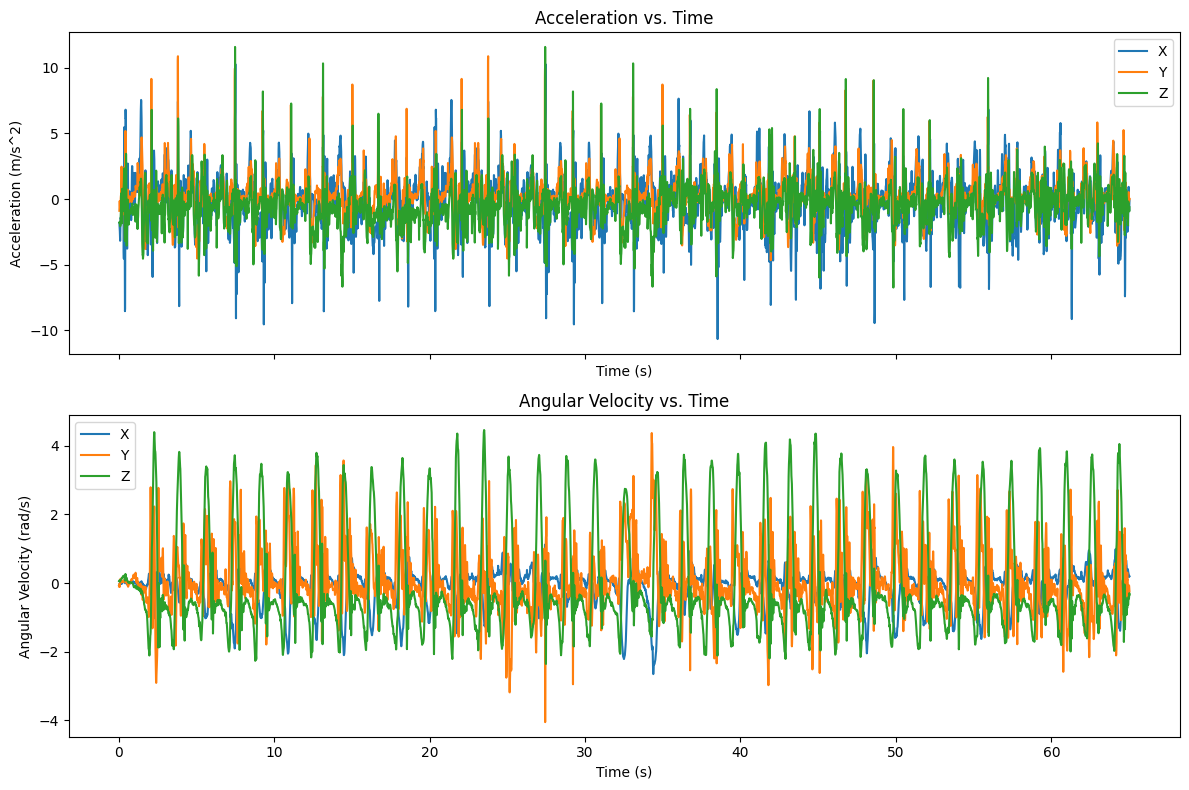

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))

# plot data raw dari dataset accelerometer
ax1.plot(dfa['Time (s)'], dfa['Linear Acceleration x (m/s^2)'], label='X')
ax1.plot(dfa['Time (s)'], dfa['Linear Acceleration y (m/s^2)'], label='Y')
ax1.plot(dfa['Time (s)'], dfa['Linear Acceleration z (m/s^2)'], label='Z')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.set_title('Acceleration vs. Time')
ax1.legend()

# plot data raw dari dataset gyroscope
ax2.plot(dfg['Time (s)'], dfg['Gyroscope x (rad/s)'], label="X")
ax2.plot(dfg['Time (s)'], dfg['Gyroscope y (rad/s)'], label="Y") 
ax2.plot(dfg['Time (s)'], dfg['Gyroscope z (rad/s)'], label="Z")
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Angular Velocity (rad/s)')
ax2.set_title('Angular Velocity vs. Time')
ax2.legend()

plt.tight_layout()
plt.show()

### Count Knee Flexion Angle and Plot


---



In [65]:
# hitung sudut knee flexion
dfa['Angle'] = np.arctan(dfa['Linear Acceleration z (m/s^2)'], np.sqrt(dfa['Linear Acceleration y (m/s^2)']**2 + dfa['Linear Acceleration x (m/s^2)']**2))

print(dfa.head)

<bound method NDFrame.head of        Time (s)  Linear Acceleration x (m/s^2)  Linear Acceleration y (m/s^2)  \
0      0.045423                      -1.811177                      -0.897278   
1      0.055423                      -1.989465                      -0.534635   
2      0.065423                      -2.101623                      -0.154194   
3      0.075423                      -2.449339                      -0.230640   
4      0.085423                      -2.972841                      -0.576819   
...         ...                            ...                            ...   
6496  64.985809                      -0.238690                       0.052222   
6497  64.995809                      -0.810998                      -0.219673   
6498  65.005809                      -0.894712                      -0.065523   
6499  65.015809                      -0.591285                       0.066440   
6500  65.025809                      -0.113387                       0.023269  

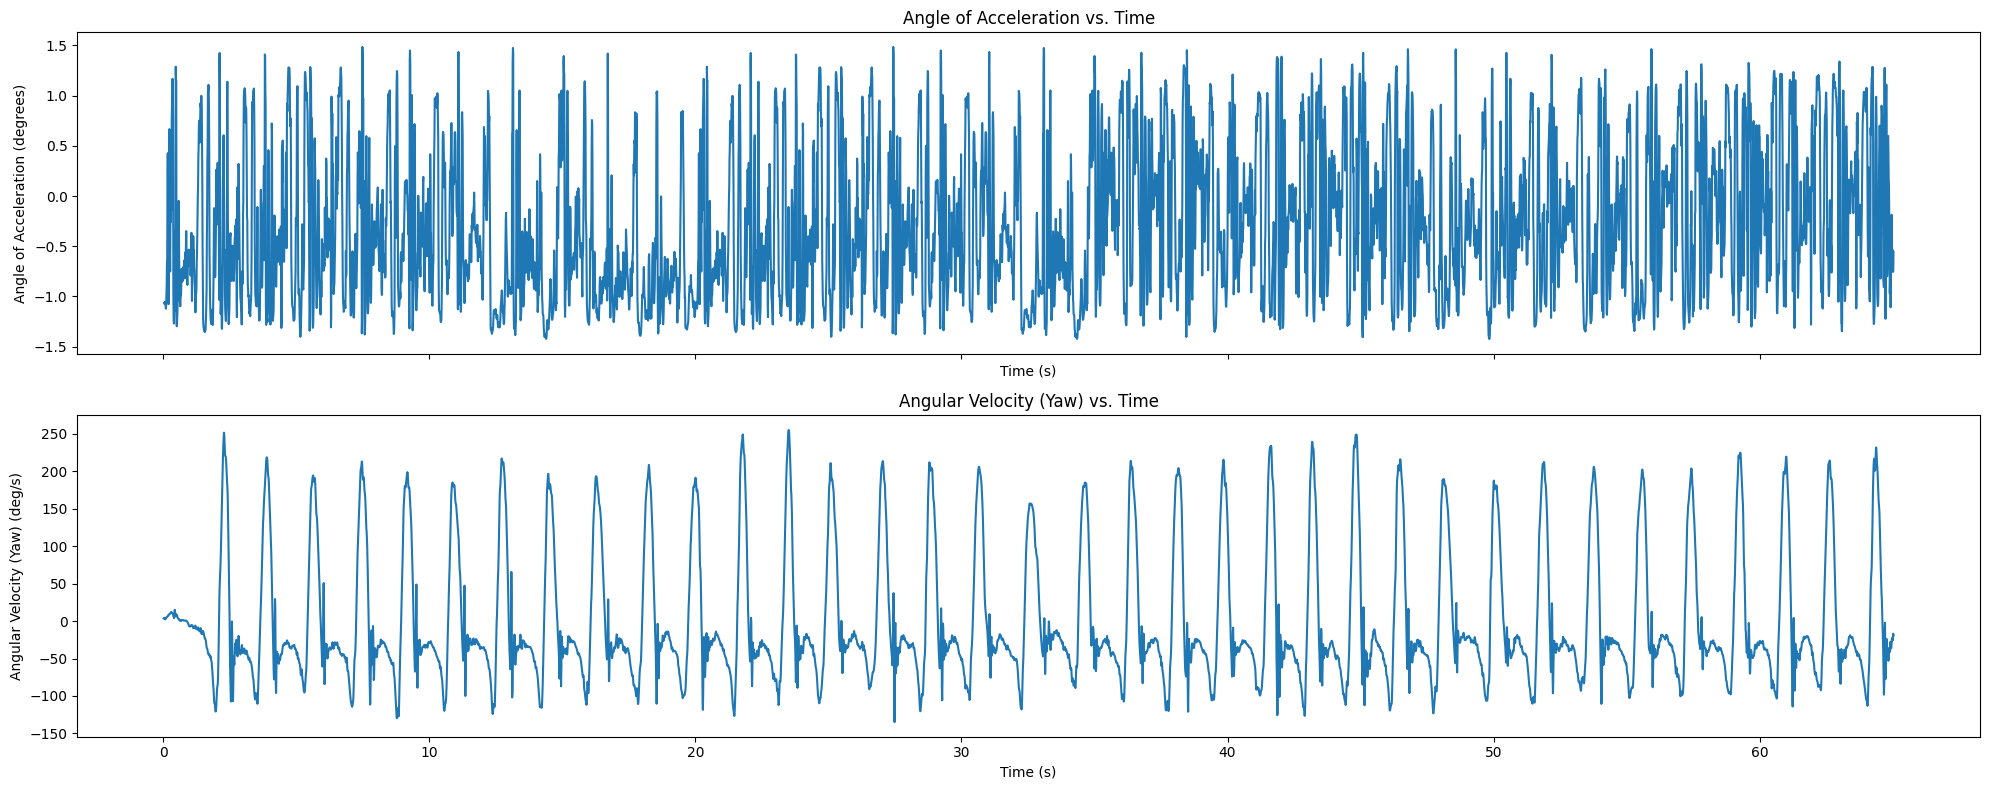

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 8))

# plot sudut accelerometer
ax1.plot(dfa['Time (s)'], dfa['Angle'])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Angle of Acceleration (degrees)')
ax1.set_title('Angle of Acceleration vs. Time')

#convert rad/s to deg/s
gyroDeg = np.degrees(dfg['Gyroscope z (rad/s)'])
# plot sudut gyroscope sumbu z / yaw
ax2.plot(dfg['Time (s)'], gyroDeg)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Angular Velocity (Yaw) (deg/s)')
ax2.set_title('Angular Velocity (Yaw) vs. Time')

plt.tight_layout()
plt.show()

### Converting Gyro Data and Clean using Complementary Filter Algorithm

---

In [73]:
gyroTime = dfg['Time (s)']
accAngle = dfa['Angle']

dt = 0.01
orientation = np.zeros_like(gyroDeg)

for i in range(1, 6100):
    gyroAngle = gyroDeg[i] * dt
    accEstimate = accAngle[i]
    
    orientation[i] = 0.8 * (orientation[i-1] + gyroAngle) + 0.2 * accEstimate
    
gaitAngle = orientation* 0.1

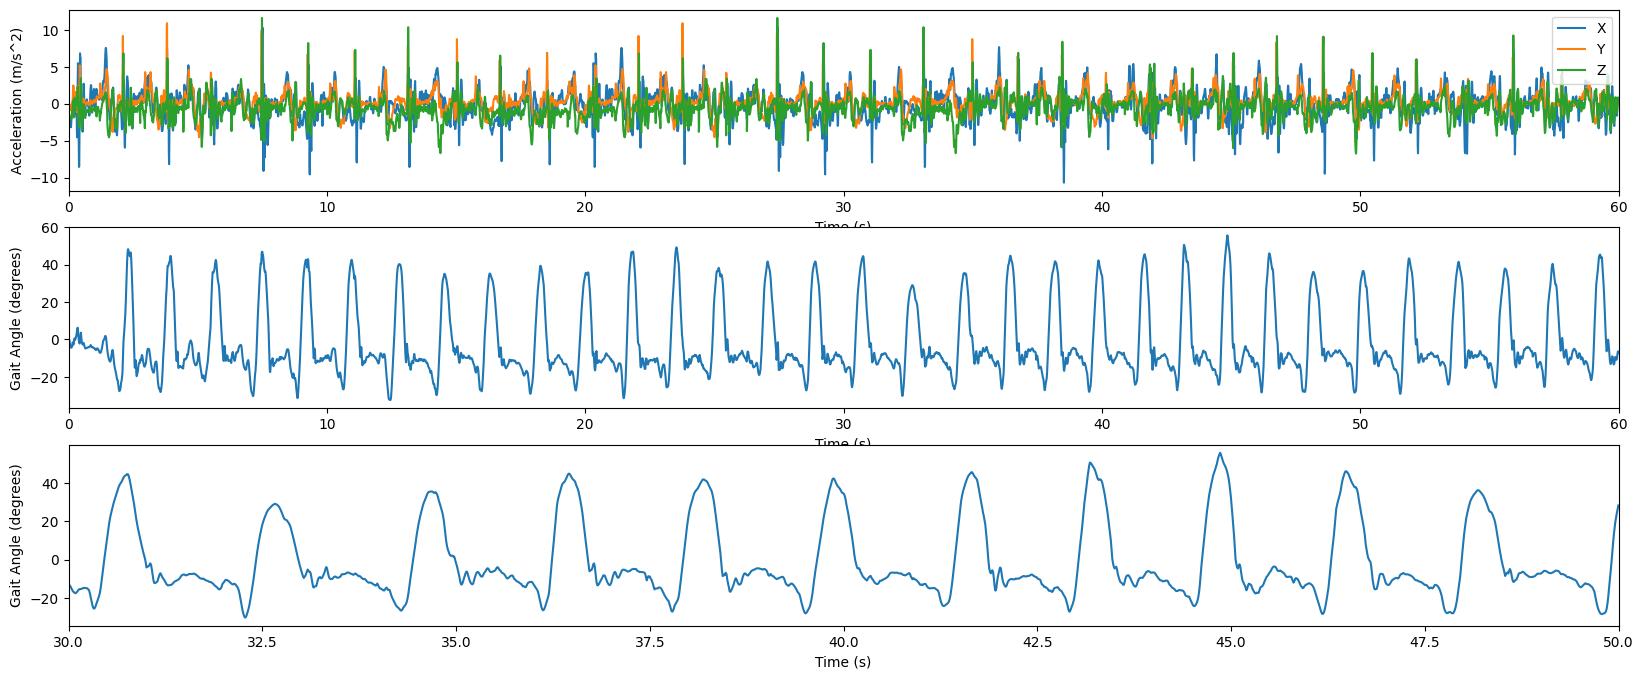

In [74]:
fig, axs = plt.subplots(3, 1, figsize=(20, 8))

# plot acceleration data
axs[0].plot(dfa['Time (s)'], dfa['Linear Acceleration x (m/s^2)'], label='X')
axs[0].plot(dfa['Time (s)'], dfa['Linear Acceleration y (m/s^2)'], label='Y')
axs[0].plot(dfa['Time (s)'], dfa['Linear Acceleration z (m/s^2)'], label='Z')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Acceleration (m/s^2)')
axs[0].set_xlim([0, 60])
axs[0].legend()

# plot gait angle
axs[1].plot(gyroTime, np.degrees(gaitAngle))
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Gait Angle (degrees)')
axs[1].set_xlim([0, 60])

axs[2].plot(gyroTime[3000:5000], np.degrees(gaitAngle[3000:5000]))
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Gait Angle (degrees)')
axs[2].set_xlim([30, 50])

plt.show()